In [16]:
#Importin libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import math
import time

In [17]:
#Reading new database.
dbpath="newdb.csv"
db= pd.read_csv(dbpath)
newdf=pd.DataFrame(db)
newdf.head()


,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,country
0,0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,FRANCE
1,1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,FRANCE
2,2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,FRANCE
3,3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,FRANCE
4,4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,FRANCE


In [18]:

new_categories = newdf.sort_values("views", ascending=False)
new_categories.head()
#calculatin the revenue per video 
new_categories['revenue'] = new_categories['views']*.004
new_categories ['views_ln'] = np.log(new_categories['views'])
new_categories ['likes_ln'] = np.log(new_categories['likes'])
last_date = new_categories['publish_time'].max()
new_categories['last_date'] = f'{last_date}'
new_categories['publish_time_nf'] = pd.to_datetime(new_categories['publish_time'], format='%Y-%m-%dT%H:%M:%SZ').dt.strftime('%Y-%m-%d')
new_categories['last_date_nf'] = pd.to_datetime(new_categories['last_date'], format='%Y-%m-%dT%H:%M:%SZ').dt.strftime('%Y-%m-%d')
new_categories['date_diff_nf'] = new_categories['last_date_nf'] - new_categories['publish_time_nf'].shift()

new_categories.head()




C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: time data '2018-03-02T05:00:19.000Z' does not match format '%Y-%m-%dT%H:%M:%SZ' (match)

In [19]:
new_categories = newdf.sort_values("views", ascending=False)

# Sort by views
new_categories = new_categories.sort_values("views", ascending=False)

# # Group by category again
# new_categories = new_categories.groupby(["category_id"]).first()

# Calculate revenue per video
new_categories['revenue'] = new_categories['views'] * 0.004

# Calculate logarithms of views and likes
new_categories['views_ln'] = np.log(new_categories['views'])
new_categories['likes_ln'] = np.log(new_categories['likes'])
new_categories






,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,country,revenue,views_ln,likes_ln
69136,28412,18.07.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,GREAT BRITAIN,1698155.648,19.866514,14.851812
68936,28212,18.06.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699,2768654,145643,97218,GREAT BRITAIN,1654346.796,19.840378,14.833872
68732,28008,18.05.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804,2719005,142006,95713,GREAT BRITAIN,1610603.216,19.813580,14.815777
68535,27811,18.04.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878,2670723,138334,93834,GREAT BRITAIN,1568147.512,19.786866,14.797860
68339,27615,18.03.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497,2618320,134625,92387,GREAT BRITAIN,1529605.988,19.761982,14.778043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21109,21109,18.01.03,"Février 2018, Performance 8 10 Ans",Melimelo78,Sports,2018-03-01T08:15:43.000Z,[none],374,43,0,5,FRANCE,1.496,5.924256,3.761200
21015,21015,18.01.03,L'histoire des enfants Tinning | La mère aux n...,NavylittleMonster,Entertainment,2018-03-01T08:00:01.000Z,[none],365,43,2,14,FRANCE,1.460,5.899897,3.761200
23860,23860,18.15.03,France: Famous climber Alain Rober scales skys...,No Comment TV,News & Politics,2018-03-14T19:18:37.000Z,"performance""|""Extreme Sports",284,3,0,0,FRANCE,1.136,5.648974,1.098612
19666,19666,18.22.02,Zemmour et Naulleau - 21 Février 2018 - Emissi...,Politika France,News & Politics,2018-02-22T04:34:54.000Z,[none],274,22,2,4,FRANCE,1.096,5.613128,3.091042


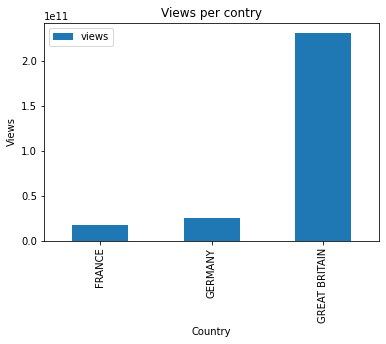

In [20]:
# Total views per country
views_per_country = new_categories.groupby(["country"]).sum()["views"]
views_per_country_df = pd.DataFrame(views_per_country)
views_per_country_df.plot(kind="bar")
plt.xlabel('Country')
plt.ylabel('Views')
plt.title('Views per contry')
plt.show()

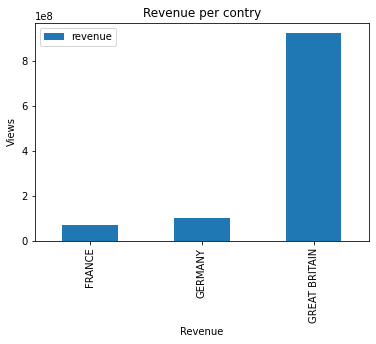

In [21]:
# Total revenue  per country
views_per_country = new_categories.groupby(["country"]).sum()["revenue"]
views_per_country_df = pd.DataFrame(views_per_country)
views_per_country_df.plot(kind="bar")
plt.xlabel('Revenue')
plt.ylabel('Views')
plt.title('Revenue per contry')
plt.show()

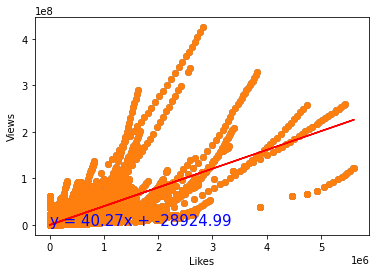

In [22]:
# Linear regression on likes and comments to views 

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_categories.head()
x_values = new_categories["likes"]
x_values 
y_values = new_categories["views"]
plt.scatter(x_values,y_values)
plt.xlabel('likes')
plt.ylabel('views')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()





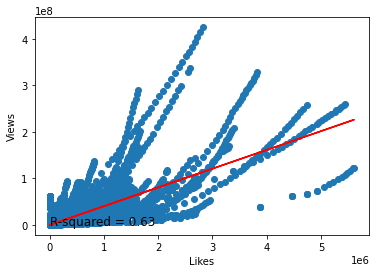

In [23]:
x_values = new_categories["likes"]
y_values = new_categories["views"]

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.xlabel('Likes')
plt.ylabel('Views')

# Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Add R-squared value to plot
r_squared = rvalue ** 2
text = "R-squared = " + str(round(r_squared,2))
plt.annotate(text, (5.8,0.6), fontsize=12, color="black")

plt.show()

# Likes intereaction explains 63% of videos views

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


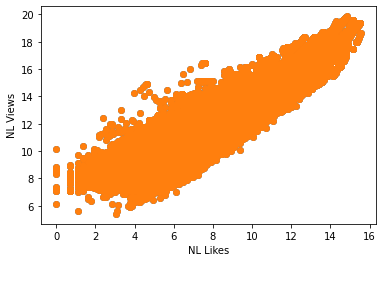

In [24]:
# Linear regression on likes and comments to views 

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = new_categories["likes_ln"]
y_values = new_categories["views_ln"]
plt.scatter(x_values,y_values)
plt.xlabel('NL likes')
plt.ylabel('NL views')


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('NL Likes')
plt.ylabel('NL Views')
plt.show()



C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


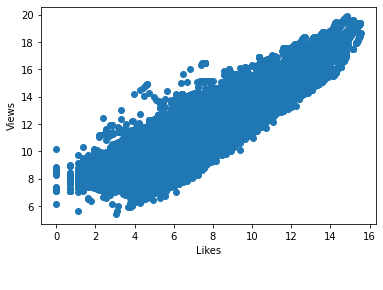

In [25]:
x_values = new_categories["likes_ln"]
y_values = new_categories["views_ln"]

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.xlabel('Likes')
plt.ylabel('Views')

# Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Add R-squared value to plot
r_squared = rvalue ** 2
text = "R-squared = " + str(round(r_squared,2))
plt.annotate(text, (5.8,0.6), fontsize=12, color="black")

plt.show()

# Likes intereaction explains 63% of videos views

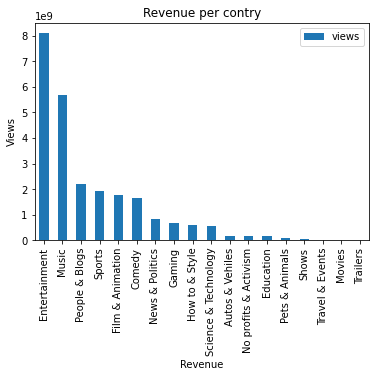

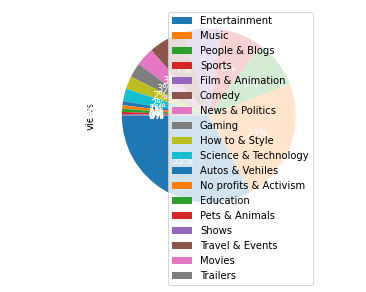

In [33]:
GR_new_categories = new_categories[(new_categories["country"] == "GREAT BRITAIN")]
FR_new_categories = new_categories[(new_categories["country"] == "FRANCE")]
DE_new_categories = new_categories[(new_categories["country"] == "GERMANY")]

views_per_category_GR = pd.DataFrame(GR_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_GR = views_per_category_GR.sort_values("views", ascending=False)
# views_per_category_GR["views"] = views_per_category_GR["views"].map("{:,}".format)

views_per_category_FR = pd.DataFrame(FR_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_FR = views_per_category_FR.sort_values("views", ascending=False)
# views_per_category_FR["views"] = views_per_category_FR["views"].map("{:,}".format)

views_per_category_DE = pd.DataFrame(DE_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_DE = views_per_category_DE.sort_values("views", ascending=False)
# views_per_category_DE["views"] = views_per_category_DE["views"].map("{:,}".format)

views_per_category_DE.plot(kind="bar")
plt.xlabel('Revenue')
plt.ylabel('Views')
plt.title('Revenue per contry')
plt.show()

# male_female.rename(columns = {"Mouse ID":'Sex'}, inplace = True)
views_per_category_DE.plot(kind='pie', y='views', autopct='%1.0f%%',textprops={'color':"w"},startangle=180)

# views_per_category_DE.plot(kind='bar')

# Fijar el orden y forzar el orden en las demás barras , para ponerlas juntas usamos subplot 


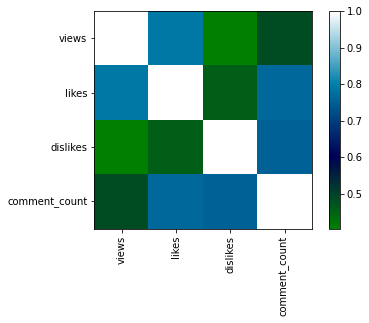

In [15]:
correlation = new_categories[['views', 'likes', 'dislikes','comment_count']].corr()

# Visualize the correlation matrix as a heatmap
plt.imshow(correlation, cmap='ocean', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()
